# Primer Examen 15%

A) Cargando el archivo JSON: 
* https://github.com/restrepo/anomaly/raw/main/solutions.json.gz

en Pandas

1) Adicione una columna nueva `'smax'` con el valor máximo en valor absoluto de la lista de enteros de la correspondiente entrada en la columna '`solution`'
2) Adicione dos columnas nuevas: `'sum_s'` (`sum_s³`) con el resultado de la suma (al cubo) de todos los números de la lista de enteros de la correspondiente entrada en la columna '`solution`'
3) Usando como semilla el número de su cédula, genere un número entero de forma aleatoria entre 0 y 390073. Seleccione el la fila correspondiente a ese número entero y construya un polinomio con esos coeficientes. Encuentre las raices reales de ese polinomio y realice el correspondiente gráfico incluyendo: el polinomio generado, sus raices (como puntos en gráfico) y la derivada del polinomio. Optimize el rango de valores en el eje $x$ y en el eje $y$ del gráfico, de manera que el polinomio y sus raices se visualicen de la mejor forma posible. (Sugerencia → use: `plt.ylim(ymin,ymax)` ). Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo


In [1]:
#Librerías
import pandas as pd
import numpy as np
import json 
import matplotlib.pylab as plt
from scipy import optimize

#Leer el archivo JSON
df = pd.read_json('https://github.com/restrepo/anomaly/raw/main/solutions.json.gz')
df

,l,k,solution,gcd,n
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11
...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8


1) Adicione una columna nueva 'smax' con el valor máximo en valor absoluto de la lista de enteros de la correspondiente entrada en la columna 'solution'

In [2]:
#Adicionar columna con el valor máximo en valor absoluto
df['smax']=df['solution'].apply(lambda z: max(map(abs,z)))
df

,l,k,solution,gcd,n,smax
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8
...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,32
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31


 2) Adicione dos columnas nuevas: 'sum_s' (sum_s³) con el resultado de la suma (al cubo) de todos los números de la lista de enteros de la correspondiente entrada en la columna 'solution'

In [3]:
#Adicionar dos columnas nuevas con los resultados de las sumas al cubo
df['sum_s']=df['solution'].apply(lambda z: sum(z)) #suma
df['sum_s**3']=df['solution'].apply(lambda h: (sum(h))**3) #suma al cubo
df

,l,k,solution,gcd,n,smax,sum_s,sum_s**3
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6,0,0
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4,0,0
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6,0,0
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7,0,0
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8,0,0
...,...,...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32,0,0
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28,0,0
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,32,0,0
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31,0,0


 3) Usando como semilla el número de su cédula, genere un número entero de forma aleatoria entre 0 y 390073. Seleccione el la fila correspondiente a ese número entero y construya un polinomio con esos coeficientes. Encuentre las raices reales de ese polinomio y realice el correspondiente gráfico incluyendo: el polinomio generado, sus raices (como puntos en gráfico) y la derivada del polinomio. Optimize el rango de valores en el eje  x  y en el eje  y  del gráfico, de manera que el polinomio y sus raices se visualicen de la mejor forma posible. (Sugerencia → use: plt.ylim(ymin,ymax) ). Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo

In [4]:
#Tomando un número aleatorio entre 0 y 390073 correspondiente al número de cédula
np.random.seed(1001368196)
x = np.random.randint(1,390073)

df.loc[x]

l                                          [1, 0, 3, -2]
k                                    [-4, -3, -1, 0, -1]
solution    [1, 1, -3, 4, -5, -10, 11, -12, 14, 20, -21]
gcd                                                    2
n                                                     11
smax                                                  21
sum_s                                                  0
sum_s**3                                               0
Name: 149199, dtype: object

In [5]:
#Entramos a la fila correspondiente al número generado
y = df.loc[x]
coeficientes = y['solution']
# Se genera polinomio con los coeficientes de la lista
p = np.poly1d(coeficientes)
pdev=p.deriv()                # derivada del polinomio

print(p)

   10     9     8     7     6      5      4      3      2
1 x  + 1 x - 3 x + 4 x - 5 x - 10 x + 11 x - 12 x + 14 x + 20 x - 21


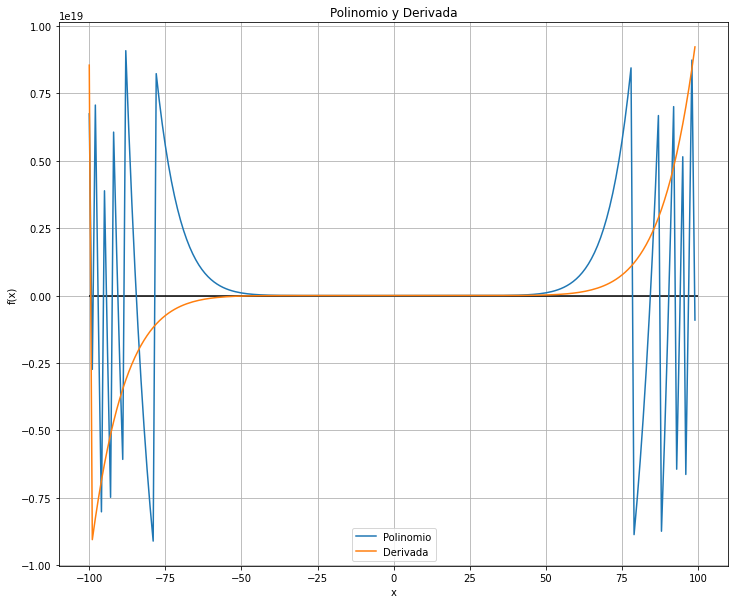

In [6]:
#Gráfico del polinomio y la derivada
x = np.arange(-100, 100, 1)

plt.figure(figsize=(12, 10))
plt.title('Polinomio y Derivada')
plt.plot(x, p(x), label='Polinomio')
plt.plot(x, pdev(x), label='Derivada')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.hlines(0, -100, 100)
plt.legend()
plt.grid()


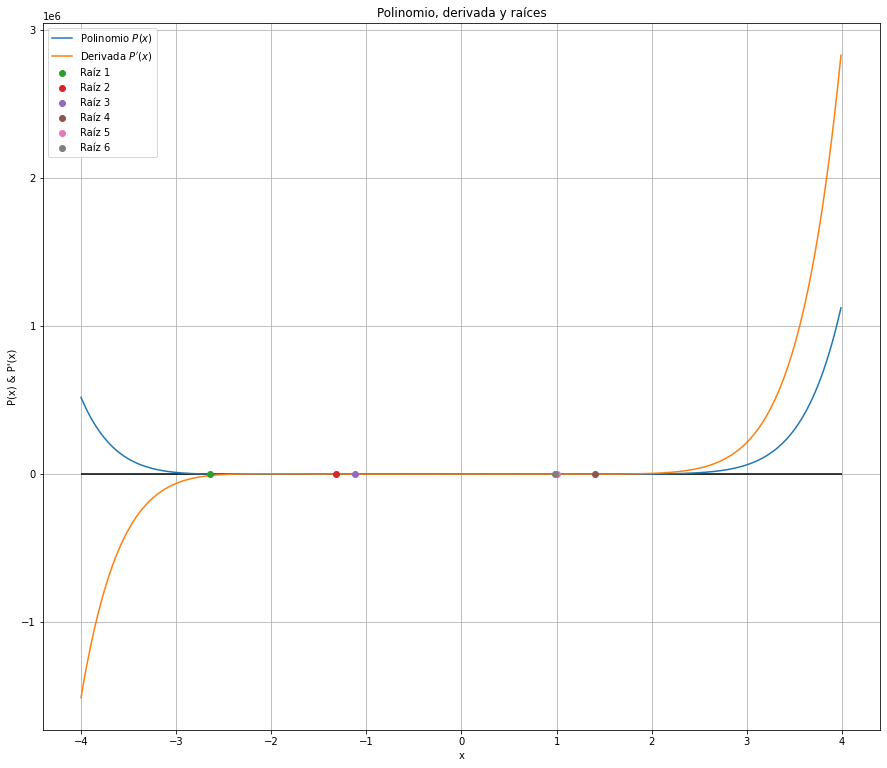

In [7]:
#Gráfico del Polinomio con sus raíces y derivada

ra = p.r    # Raíces del polinomio

x = np.arange(-4, 4, 0.01)
plt.figure(figsize=(15, 13))
plt.title('Polinomio, derivada y raíces')
plt.plot(x, p(x), label='Polinomio $P(x)$')
plt.plot(x, pdev(x), label="Derivada $P'(x)$")

# Se filtran las raíces reales 
j = 1
for i in range(ra.size):
  if (abs(ra[i].imag) < 1.0e-15):
    plt.plot(ra[i].real, 0, 'o', label="Raíz %d" %j)
    j += 1

plt.xlabel('x')
plt.ylabel("P(x) & P'(x)")
plt.hlines(0, -4, 4)
plt.legend()
plt.grid()

Nota: Las raíces generadas faltantes están superpuestas con las graficadas




B)

I) Usando como semilla el número de su cédula, genere de forma aletoria un número entero entre 1 y 5

II) De acuerdo al entero obtenido, escoja una de las siguientes cinco funciones 
1. $$x\operatorname{e}^x=p\,, $$
2. $$\frac{\sin x}{x}=+p\,,$$
3. $$\frac{\sin x}{x}=-p\,,$$
4. $$\frac{\cos x}{x}=+p\,,$$
5. $$\frac{\cos x}{x}=-p\,,$$
III) Genere un número aleatorio entre 0 y 1 y asignelo al valor de $p$
IV) Encuentre la solución a la ecuación trascendental para el intervalo $x$ entre -10 y 10 y gráfique la correspondiente función trascendental y las correspondientes soluciones. . Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo.

A modo de nota curiosa: estas ecuaciones trascendentales están asociadas a soluciones de la ecuación de Schödinger en mecánica cuántica: https://doi.org/10.1080/14786435.2015.1081425

I) Usando como semilla el número de su cédula, genere de forma aletoria un número entero entre 1 y 5

In [8]:
#Se genera número aleatorio entre 1 y 5
np.random.seed(1001368196)
num = np.random.randint(1,5)
num

3

In [9]:
#Se escoje p menor a 0.2 debido a que el número generado aleatoriamente no funciona
p = 0.15

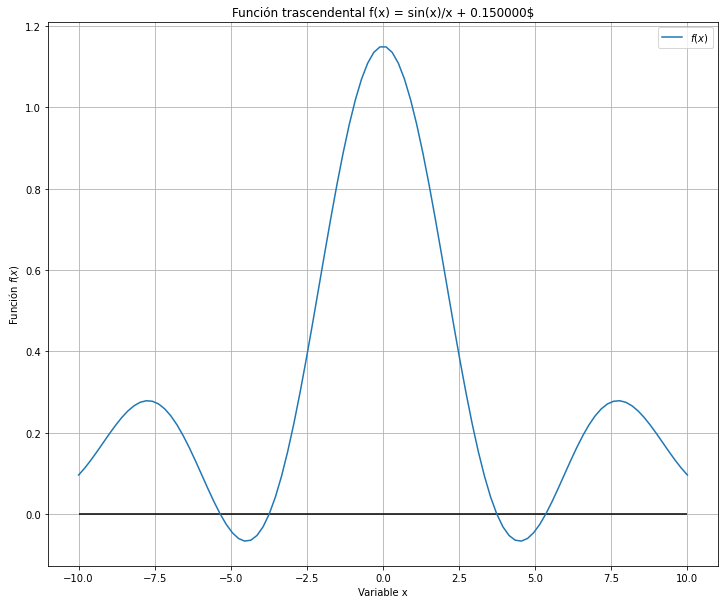

In [10]:
#Gráfica de la función
f = lambda x: np.sin(x)/x + p

x = np.linspace(-10, 10, 100)

plt.figure(figsize=(12, 10))
plt.title("Función trascendental f(x) = sin(x)/x + %lf$" %p)
plt.plot(x, f(x), label='$f(x)$')
plt.hlines(0, -10, 10)
plt.xlabel('Variable x')
plt.ylabel('Función $f(x)$')
plt.legend()
plt.grid()

In [11]:
# Se usa el método de Newton para hallar las raíces de la función
x1 = optimize.newton(f, -6, tol=1.0e15)
x2 = optimize.newton(f, -4, tol=1.0e15)
x3 = optimize.newton(f, 4, tol=1.0e15)
x4 = optimize.newton(f, 6, tol=1.0e15)

print('Las raíces o soluciones de las función anterior son:')
print('-> x = %lf' %x1)
print('-> x = %lf' %x2)
print('-> x = %lf' %x3)
print('-> x = %lf' %x4)

Las raíces o soluciones de las función anterior son:
-> x = -5.383558
-> x = -3.662206
-> x = 3.662206
-> x = 5.383558


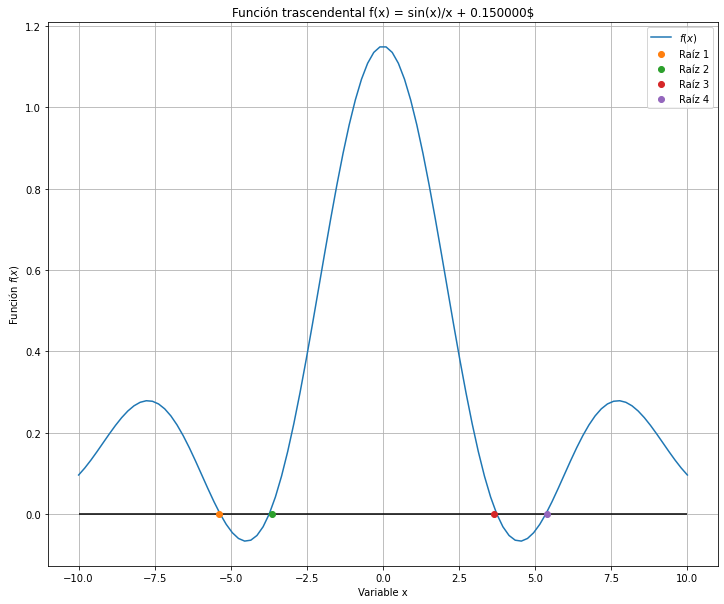

In [12]:
#Gráfico de la función
plt.figure(figsize=(12, 10))
plt.title("Función trascendental f(x) = sin(x)/x + %lf$" %p)
plt.plot(x, f(x), label='$f(x)$')

plt.plot(x1, 0, 'o', label='Raíz 1')
plt.plot(x2, 0, 'o', label='Raíz 2')
plt.plot(x3, 0, 'o', label='Raíz 3')
plt.plot(x4, 0, 'o', label='Raíz 4')

plt.hlines(0, -10, 10)
plt.xlabel('Variable x')
plt.ylabel('Función $f(x)$')
plt.legend()
plt.grid()